# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Импортируем библиотеку pandas и matplotlib.pyplot. Считаем данные из csv-файла в датафрейм и сохраним в переменную data. Выведем первые 5 строк таблицы:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Построим общую гистограмму для всех числовых столбцов таблицы:

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

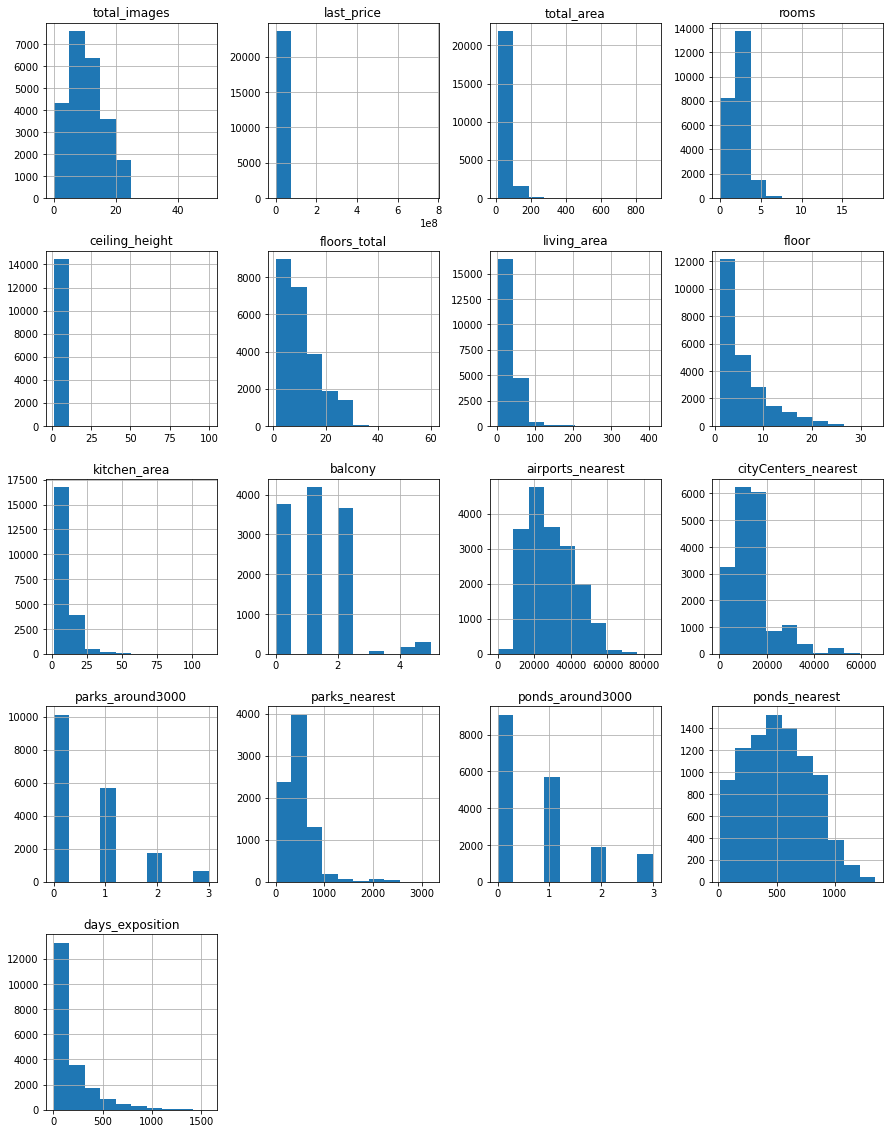

In [3]:
data.hist(figsize=(15, 20),bins=10)

Выведем основную информацию с помощью метода info():

In [4]:
print('Количество явных дубликатов:', data.duplicated().sum())
print()
data.info()

Количество явных дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  

Вывод: в полученных данных при изучении информации выделяется большое количество пропусков, написание столбцов не змеиным шрифтом, неверные типы данных значений. Количество явных дубликатов не найдено, гистограммы требуют более детального анализа. Разберемся с этим в следующих шагах.

### Предобработка данных

В данных обнаружены пропущенные значения, выведем их количество по каждому столбцу и проверим есть ли в таблице дубликаты:

In [5]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Заменим названия столбцов на корректные и поясняющие в каких величинах представлены данные:

In [6]:
data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest_m',\
                       'ponds_around3000':'ponds_amount_around_3000_m',\
                       'parks_around3000':'parks_amount_around_3000_m',\
                       'ceiling_height': 'ceiling_height_m',\
                       'living_area': 'living_area_m2',\
                       'kitchen_area' : 'kitchen_area_m2',\
                       'airports_nearest' : 'airports_nearest_m',\
                       'parks_nearest' : 'parks_nearest_m',\
                       'ponds_nearest' : 'ponds_nearest_m',\
                      'total_area' : 'total_area_m2',\
                      'last_price': 'last_price_rub'},inplace=True)

Заменим пропущенные значения в столбцах `balcony`, `park_nearest_m`, `is_apartment`, `airports_nearest_m`, `parks_around_3000_m`, `ponds_around_3000_m`, `ponds_nearest_m`, `city_centers_nearest` на 0. Во всех этих столбцах продавец не указал в ячейке значение, скорее всего, потому что оно отсутствует. Например наличие рядом парка, водоема или аэропорта. Данные пропуски относятся к неслучайным. Выведем обновленные данные по количеству пропущенных значений:

In [7]:
data['balcony'] = data['balcony'].fillna(value=0)
data['parks_nearest_m'] = data['parks_nearest_m'].fillna(value=0)
data['is_apartment'] = data['is_apartment'].fillna(value=0)
data['airports_nearest_m'] = data['airports_nearest_m'].fillna(value=0)
data['city_centers_nearest_m'] = data['city_centers_nearest_m'].fillna(value=0)
data['parks_amount_around_3000_m'] = data['parks_amount_around_3000_m'].fillna(value=0)
data['ponds_amount_around_3000_m'] = data['ponds_amount_around_3000_m'].fillna(value=0)
data['ponds_nearest_m'] = data['ponds_nearest_m'].fillna(value=0)        
print(data.isna().sum())

total_images                     0
last_price_rub                   0
total_area_m2                    0
first_day_exposition             0
rooms                            0
ceiling_height_m              9195
floors_total                    86
living_area_m2                1903
floor                            0
is_apartment                     0
studio                           0
open_plan                        0
kitchen_area_m2               2278
balcony                          0
locality_name                   49
airports_nearest_m               0
city_centers_nearest_m           0
parks_amount_around_3000_m       0
parks_nearest_m                  0
ponds_amount_around_3000_m       0
ponds_nearest_m                  0
days_exposition               3181
dtype: int64


Пропущенные значения в столбце `ceiling_height` заменим на медианное значение, так как в данном случае это значение наименее вариативное и пропуск скорее всего образовался из-за стандарной высоты потолка, которая равна медиане. Жилая площадь (`living_area_m2`) и площадь кухни (`kitchen_area_m2`) зависят от общей площади квартиры, поэтому мы можем посчитать какие доли в среднем занимают оба показателя и применить их к пустым значениям. Данные пропуски относятся к случайным. Выведем обновленные данные с количеством пропущенных значений на экран:

In [8]:
medium_ceiling = data['ceiling_height_m'].median()
data['ceiling_height_m'] = data['ceiling_height_m'].fillna(value=medium_ceiling)
avg_kitchen_area = (data['kitchen_area_m2'] / data['total_area_m2']).median()
data['kitchen_area_m2'] = data['kitchen_area_m2'].fillna(value=avg_kitchen_area * data['total_area_m2'])
avg_living_area = (data['living_area_m2'] / data['total_area_m2']).median()
data['living_area_m2'] = data['living_area_m2'].fillna(value=avg_living_area * data['total_area_m2'])
print(data.isna().sum())
print()
print('Медианное значение высоты потолков:', medium_ceiling)
print('Медианная доля площади кухни в квартире:', avg_kitchen_area)
print('Медианная доля жилой площади в квартире:', avg_living_area)

total_images                     0
last_price_rub                   0
total_area_m2                    0
first_day_exposition             0
rooms                            0
ceiling_height_m                 0
floors_total                    86
living_area_m2                   0
floor                            0
is_apartment                     0
studio                           0
open_plan                        0
kitchen_area_m2                  0
balcony                          0
locality_name                   49
airports_nearest_m               0
city_centers_nearest_m           0
parks_amount_around_3000_m       0
parks_nearest_m                  0
ponds_amount_around_3000_m       0
ponds_nearest_m                  0
days_exposition               3181
dtype: int64

Медианное значение высоты потолков: 2.65
Медианная доля площади кухни в квартире: 0.1724137931034483
Медианная доля жилой площади в квартире: 0.5678598992678503


Проверим столбец `days_exposition`, выгрузим датафрейм отфильтровав его по пустым значениям данного столбца

In [9]:
data.query('days_exposition.isna()')

,total_images,last_price_rub,total_area_m2,first_day_exposition,rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,kitchen_area_m2,balcony,locality_name,airports_nearest_m,city_centers_nearest_m,parks_amount_around_3000_m,parks_nearest_m,ponds_amount_around_3000_m,ponds_nearest_m,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,0,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,40.658769,22,0,...,18.900000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,0.0,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.65,22.0,22.714396,3,0,...,6.896552,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.300000,7,0,...,7.000000,0.0,Санкт-Петербург,30011.0,12872.0,0.0,0.0,0.0,0.0,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.700000,9,0,...,8.300000,2.0,Санкт-Петербург,15114.0,12702.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.400000,17,0,...,15.600000,0.0,Санкт-Петербург,11827.0,11459.0,0.0,0.0,0.0,0.0,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.300000,5,0,...,5.600000,1.0,Ломоносов,48393.0,51818.0,0.0,0.0,0.0,0.0,NaN
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.300000,3,0,...,13.830000,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.700000,1,0,...,9.775862,0.0,село Рождествено,0.0,0.0,0.0,0.0,0.0,0.0,NaN


В таблице остаются пропущенные значения в столбцах `locality_name` и `floors_total`. Эти значения нельзя заменить средними и они не зависят от других показателей. Количество этажей в доме, например, может быть 2 или 15, в среднем дом будет 7-этажный, что не корректно. Эти данные нельзя использовать в анализе, потому что количество этажей в доме будет влиять на другие факторы, напрмер цену, наличие водоемов и парков, эти строки мы удалим из датафрейма (таких значений всего 86, это не повлияет на общие выводы). Также нельзя заменить и название населенного пункта, это значение так же не зависит ни от каких других значений в таблице. Пропущенные значения в этом столбце мы заменим значением 'Unknown'. Данный тип пропусков полностью случайный.

In [10]:
data = data.dropna(subset =['floors_total'])
data['locality_name'] = data['locality_name'].fillna(value='Unknown')
data = data.drop_duplicates().reset_index(drop=True)

Проверим типы данных в каждом столбце:

In [11]:
data.dtypes

total_images                    int64
last_price_rub                float64
total_area_m2                 float64
first_day_exposition           object
rooms                           int64
ceiling_height_m              float64
floors_total                  float64
living_area_m2                float64
floor                           int64
is_apartment                   object
studio                           bool
open_plan                        bool
kitchen_area_m2               float64
balcony                       float64
locality_name                  object
airports_nearest_m            float64
city_centers_nearest_m        float64
parks_amount_around_3000_m    float64
parks_nearest_m               float64
ponds_amount_around_3000_m    float64
ponds_nearest_m               float64
days_exposition               float64
dtype: object

Из таблицы следует, что тип данных в столбце `first_day_exposition` следует заменить с **object** на **datetime**, так как в нем содержатся даты. `floors_total` и `balcony` на **int**, потому что не может быть дробного общего числа этажей в доме или половины балкона. `is_apartment` присвоить тип **bool**, так как в столбце содержатся булевы значения True и False.

In [12]:
data['balcony'] = data['balcony'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['floors_total'] = data['floors_total'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')
data.dtypes

total_images                           int64
last_price_rub                       float64
total_area_m2                        float64
first_day_exposition          datetime64[ns]
rooms                                  int64
ceiling_height_m                     float64
floors_total                           int64
living_area_m2                       float64
floor                                  int64
is_apartment                            bool
studio                                  bool
open_plan                               bool
kitchen_area_m2                      float64
balcony                                int64
locality_name                         object
airports_nearest_m                   float64
city_centers_nearest_m               float64
parks_amount_around_3000_m           float64
parks_nearest_m                      float64
ponds_amount_around_3000_m           float64
ponds_nearest_m                      float64
days_exposition                      float64
dtype: obj

Проверим столбец с названиями населенных пунктов на неявные дубликаты:

In [13]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Неявных дубликатов много, так как присутствуют названия с разными населенными пунктами и вообще без населенных пунктов, создадим столбец с типом населенного пункта, а само название оставим в текущем столбце, таким образом значительно сократив наличие дубликатов, а также сохранив тип населенного пункта в отдельном столбце. Стоит отметить,что Санкт-Петербург - это город, поэтому его мы выделим в данную группу отдельно, а названия без населенных пунктов определим в группу unknown:

In [14]:
def locality_type(row):
    try:
        if 'железнодорож' in row:
            return 'поселок при железнодорожной станции'        
        elif 'коттедж' in row:
            return 'коттеджный поселок'
        elif 'Пансионат' in row:
            return 'пансионат'
        elif 'садовое товарищество' in row or 'садоводческое некоммерческое товарищество' in row:
            return 'садовое товарищество'
        elif 'посёлок городского типа' in row or 'поселок городского типа' in row or 'городской поселок' in row:
            return 'поселок городского типа'
        elif 'поселок' in row or 'посёлок' in row:
            return 'поселок'        
        elif 'село' in row:
            return 'село'
        elif 'деревня' in row:
            return 'деревня'
        elif 'Санкт-Петербург' in row:
            return 'город'
        else:
            return 'unknown'
    except:
        return 'no'
data['locality_type'] = data['locality_name'].apply(locality_type)
print(data['locality_type'].value_counts())

город                                  15651
unknown                                 4331
поселок                                 2258
деревня                                  944
поселок городского типа                  385
село                                      32
садовое товарищество                       5
коттеджный поселок                         3
пансионат                                  2
поселок при железнодорожной станции        2
Name: locality_type, dtype: int64


In [15]:
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа ', '')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа ', '')
data['locality_name'] = data['locality_name'].str.replace('городской ', '')
data['locality_name'] = data['locality_name'].str.replace('посёлок ', '')
data['locality_name'] = data['locality_name'].str.replace('поселок ', '')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной станции ', '')
data['locality_name'] = data['locality_name'].str.replace('станции ', '')
data['locality_name'] = data['locality_name'].str.replace('коттеджный ', '')
data['locality_name'] = data['locality_name'].str.replace('село ', '')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace('деревня ', '')
data['locality_name'] = data['locality_name'].str.replace('Пансионат ', '')
print(data['locality_name'].unique())

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино'
 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет'
 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодёжное'
 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск'
 'Александровская' 'Лопухинка' 'Пикалёво' 'Терволово' 'Советский'
 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози'
 'Вартемяги' 'Тельмана' '

In [16]:
data.sample(5)

,total_images,last_price_rub,total_area_m2,first_day_exposition,rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,balcony,locality_name,airports_nearest_m,city_centers_nearest_m,parks_amount_around_3000_m,parks_nearest_m,ponds_amount_around_3000_m,ponds_nearest_m,days_exposition,locality_type
4221,15,9000000.0,57.8,2019-04-03,2,3.10,7,37.3,7,False,...,0,Санкт-Петербург,11601.0,8504.0,1.0,359.0,3.0,617.0,5.0,город
8703,15,6100000.0,57.0,2019-04-25,2,2.60,13,30.0,3,False,...,1,Санкт-Петербург,32263.0,12010.0,0.0,0.0,0.0,0.0,NaN,город
21229,8,4500000.0,51.0,2017-05-04,2,2.50,16,28.8,8,False,...,0,Санкт-Петербург,14755.0,13551.0,0.0,0.0,0.0,0.0,139.0,город
3837,12,7980000.0,80.0,2017-12-14,3,3.15,5,59.0,4,False,...,1,Санкт-Петербург,36716.0,9004.0,2.0,352.0,0.0,0.0,70.0,город
17793,20,23500000.0,111.0,2019-03-06,3,3.00,9,60.0,6,False,...,0,Санкт-Петербург,32685.0,6131.0,0.0,0.0,1.0,357.0,NaN,город


Найдем и устраним редкие и выбивающиеся значения, сначала выведем максимальные значения всех столбцов:

In [17]:
data.max()

total_images                                   50
last_price_rub                        763000000.0
total_area_m2                               900.0
first_day_exposition          2019-05-03 00:00:00
rooms                                          19
ceiling_height_m                            100.0
floors_total                                   60
living_area_m2                              409.7
floor                                          33
is_apartment                                 True
studio                                       True
open_plan                                    True
kitchen_area_m2                             112.0
balcony                                         5
locality_name                     имени Свердлова
airports_nearest_m                        84869.0
city_centers_nearest_m                    65968.0
parks_amount_around_3000_m                    3.0
parks_nearest_m                            3190.0
ponds_amount_around_3000_m                    3.0


В данных сразу выделяется столбец `ceiling_height_m`, с информацией о высоте потолка равной 100 метрам. Выведем уникальные значения столбца на экран:

In [18]:
print(data['ceiling_height_m'].sort_values().unique())

[  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3.06   3.07   3.08   3.09   3.1    3.11   3.12   3.13   3.14   3.15
   3.16   3.17   3.18   3.2    3.21   3.22   3.23   3.24   3.25   3.26
   3.27   3.28   3.29   3.3    3.31   3.32   3.33   3.34   3.35   3.36
   3.37   3.38   3.39   3.4    3.42   3.43   3.44   3.45   3.46   3.47
   3.48   3.49   3.5    3.51   3.52   3.53   3.54   3.55   3.56   3.57
   3.58   3.59   3.6    3.62   3.63   3.65   3.66   3.67   3.68   3.69
   3.7    3.75   3.76   3.78   3.8    3.82   3.83   3.84   3.85   3.86
   3.8

Потолки выше 20 метров скорее всего были введены ошибочно и имелись в виду вещественные значения, например 2.0 м вместо 20. Заменим такие значения на корректные и проверим не осталось ли таких значенией:

In [19]:
rows = data['ceiling_height_m']/10
data['ceiling_height_m'] = data['ceiling_height_m'].where(data['ceiling_height_m']<20, rows)
print('Максимальная высота потолка:', data['ceiling_height_m'].max(), 'метров')

Максимальная высота потолка: 14.0 метров


Потолки 14 метров тоже вызывают вопросы, выгрузим данные по этой квартире и проверим с чем может быть связана ошибка

In [20]:
data[data['ceiling_height_m']>=14]

,total_images,last_price_rub,total_area_m2,first_day_exposition,rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,balcony,locality_name,airports_nearest_m,city_centers_nearest_m,parks_amount_around_3000_m,parks_nearest_m,ponds_amount_around_3000_m,ponds_nearest_m,days_exposition,locality_type
14999,19,5600000.0,56.4,2018-05-11,2,14.0,14,32.4,5,False,...,2,Санкт-Петербург,14814.0,13610.0,0.0,0.0,0.0,0.0,315.0,город


Из таблицы видно, что в соседнем столбце указано значение 14 этажей в доме, это значит, что при заполнении объявления произошла ошибка человеческого фактора, данные ошибочно ввелись в оба столбца. Заменим высоту потолков в этом объявлении на медианное значение, расчитанное ранее:

In [21]:
data['ceiling_height_m'] = data['ceiling_height_m'].where(data['ceiling_height_m']!=14, medium_ceiling)
print('Максимальная высота потолка:', data['ceiling_height_m'].max(), 'метров')

Максимальная высота потолка: 10.3 метров


Остальные максимальные данные возможны. Теперь проверим минимальные значения по столбцам:

In [22]:
data.min()

total_images                                    0
last_price_rub                            12190.0
total_area_m2                                12.0
first_day_exposition          2014-11-27 00:00:00
rooms                                           0
ceiling_height_m                              1.0
floors_total                                    1
living_area_m2                                2.0
floor                                           1
is_apartment                                False
studio                                      False
open_plan                                   False
kitchen_area_m2                               1.3
balcony                                         0
locality_name                             Unknown
airports_nearest_m                            0.0
city_centers_nearest_m                        0.0
parks_amount_around_3000_m                    0.0
parks_nearest_m                               0.0
ponds_amount_around_3000_m                    0.0


Из данных выделяется столбец `last_price_rub`, так как цена на квартиру 12 190 рублей подозрительна. Проверим все квартиры с ценой ниже 400 000 рублей

In [23]:
data[data['last_price_rub']<400000]

,total_images,last_price_rub,total_area_m2,first_day_exposition,rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,balcony,locality_name,airports_nearest_m,city_centers_nearest_m,parks_amount_around_3000_m,parks_nearest_m,ponds_amount_around_3000_m,ponds_nearest_m,days_exposition,locality_type
8765,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,0.0,8.0,город


В диапозоне до 400 000 рублей данная квартира одна, из остальных данных следует, что объявление скорее всего мошенническое или цена указана в другой валюте, потому что для двухкомнатной квартиры площадью 109 кв.метров в Санкт-Петербурге эта цена не выглядит реалистичной. Удалим строку с этим объявлением.

In [24]:
data = data.query('index!=8765').reset_index(drop=True)
print('Минимальная стоимость квартиры:', data['last_price_rub'].min(), 'рублей')

Минимальная стоимость квартиры: 430000.0 рублей


Также выделяется столбец `ceiling_height_m` с высотой потолков 1 метр, проверим квартиры с высотой потолков ниже 2 метров:

In [25]:
data[data['ceiling_height_m']<2]

,total_images,last_price_rub,total_area_m2,first_day_exposition,rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,balcony,locality_name,airports_nearest_m,city_centers_nearest_m,parks_amount_around_3000_m,parks_nearest_m,ponds_amount_around_3000_m,ponds_nearest_m,days_exposition,locality_type
5693,5,1500000.0,42.8,2017-08-14,2,1.20,2,27.5,1,False,...,0,Мга,0.0,0.0,0.0,0.0,0.0,0.0,248.0,поселок
16865,5,4100000.0,40.0,2017-10-17,1,1.75,37,17.4,5,False,...,0,Санкт-Петербург,18732.0,20444.0,0.0,0.0,3.0,80.0,71.0,город
22507,16,6000000.0,55.0,2018-10-31,2,1.00,12,32.4,7,False,...,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0,город


Таких значений всего 3, они также не выглядят реалистичными, избавимся от этих строк, потому что подставить какое-либо значение не представляется возможным, не известно почему была допущена данная ошибка и какое значение имелось в виду

In [26]:
data = data.query('ceiling_height_m >=2').reset_index(drop=True)
print('Минимальная высота потолка:', data['ceiling_height_m'].min(), 'метра')

Минимальная высота потолка: 2.0 метра


Последнее, что требует проверки - это столбец `living_area_m2` с информацией о жилой площади, равной 2 метрам. С помощью последовательной фильтрации найдем аномальные значения, в которых жилая площадь меньше 10 метров, при этом от общей площади квартиры она составляет 25% (что существенно ниже медианного значения жилой площади), при этом сумма площади кухни и жилой площади вдвое меньше общей площади квартиры. Учитывая все эти критерии, найденные значения будут аномальными. Выведем на экран столбцы `total_area_m2`, `living_area_m2`, `kitchen_area_m2`

In [27]:
data['living_area_m2'].min()
filtered_living_area = data[data['living_area_m2']<=10]
x4_living_area = filtered_living_area['living_area_m2']*4
sum_living_Kitchen = filtered_living_area['living_area_m2']+filtered_living_area['kitchen_area_m2']
filtered_living_area = filtered_living_area[filtered_living_area['total_area_m2'] >= x4_living_area]
filtered_living_area = filtered_living_area.query('total_area_m2 >= ((kitchen_area_m2+living_area_m2)*2)')
filtered_living_area

,total_images,last_price_rub,total_area_m2,first_day_exposition,rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,balcony,locality_name,airports_nearest_m,city_centers_nearest_m,parks_amount_around_3000_m,parks_nearest_m,ponds_amount_around_3000_m,ponds_nearest_m,days_exposition,locality_type
3232,7,4440000.0,41.0,2017-07-02,1,2.65,17,3.0,17,False,...,0,Санкт-Петербург,19272.0,13073.0,0.0,0.0,0.0,0.0,216.0,город
8297,9,4800000.0,52.0,2017-10-25,2,2.65,5,9.0,2,False,...,1,Санкт-Петербург,33358.0,13171.0,0.0,0.0,2.0,118.0,119.0,город
13857,20,6350000.0,52.0,2018-02-06,2,3.00,6,2.0,2,False,...,0,Санкт-Петербург,32453.0,6521.0,0.0,0.0,1.0,1012.0,91.0,город
17510,11,2680000.0,22.0,2018-08-11,0,2.65,25,5.0,8,False,...,2,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0,город
21674,0,2330000.0,23.0,2018-01-01,0,2.65,24,2.0,22,False,...,0,Мурино,0.0,0.0,0.0,0.0,0.0,0.0,66.0,поселок
21859,15,6100000.0,77.6,2019-02-28,4,2.50,9,5.4,1,False,...,0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,0.0,33.0,город
23486,14,64990000.0,139.0,2015-11-24,3,3.00,8,3.0,8,False,...,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0,город


Из таблицы следует, что аномальных значений всего 7 и выглядят они, как и предполагалось, не реалистично, например квартира с площадью 139 метров, жилой площадью 3 метра и кухней 16 метров. Применим условия и удалим строки. Заменить их другими данными не возможно, нет информации об остальной площади.

In [28]:
data = data.query('living_area_m2 >10 and (total_area_m2<living_area_m2*4) \
and (total_area_m2 < kitchen_area_m2*2+living_area_m2*2)').reset_index(drop=True)
print('Минимальная жилая площадь:', data['living_area_m2'].min(), 'кв.м')
data[['total_area_m2','living_area_m2','kitchen_area_m2']].tail(5)

Минимальная жилая площадь: 10.08 кв.м


,total_area_m2,living_area_m2,kitchen_area_m2
23453,133.81,73.300000,13.830000
23454,59.00,38.000000,8.500000
23455,56.70,29.700000,9.775862
23456,76.75,43.583247,23.300000
23457,32.30,12.300000,9.000000


Теперь данные выглядят логично, осталось привести их к виду двух знаков после запятой:

In [29]:
data = data.round({'living_area_m2':2, 'kitchen_area_m2':2})
data[['total_area_m2','living_area_m2','kitchen_area_m2']].sample(5)

,total_area_m2,living_area_m2,kitchen_area_m2
8191,30.00,17.00,6.00
16044,61.20,34.75,10.55
11991,32.50,17.50,6.30
13811,55.79,41.06,6.03
16397,26.60,19.60,4.59


Вывод:мы нашли и устранили пропущенные значения, рассмотрели и преобразовали типы данных в столбцах, устранили неявные дубликаты и выбивающиеся значения. Теперь можно приступать к следующему этапу.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим столбец `price_one_m2` с ценой одного квадратного метра

In [30]:
data['price_one_m2'] = data['last_price_rub'] / data['total_area_m2']
data = data.round({'price_one_m2':2})

Добавим столбцы `exposition_weekday`, `exposition_month`, `exposition_year` с днем недели, месяцем и годом публикации объявления:

In [31]:
data['exposition_weekday'] = data['first_day_exposition'].dt.day_name()
data['exposition_month'] = data['first_day_exposition'].dt.month_name()
data['exposition_year'] = data['first_day_exposition'].dt.year

Добавим столбец `floor_type` с типом этажа квартиры

In [32]:
def floor_types(row):
    try:
        if row['floor'] == 1:
            return 'первый'        
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'no'
data['floor_type'] = data.apply(floor_types, axis=1)
print(data['floor_type'].value_counts())

другой       17267
последний     3307
первый        2884
Name: floor_type, dtype: int64


Добавим столбец `city_centers_nearest_km` с расстоянием до центра города в км

In [33]:
data['city_centers_nearest_km'] = data['city_centers_nearest_m']/1000
data = data.round({'city_centers_nearest_km':0})

Выведем на экран все добавленные столбцы:

In [34]:
data[['price_one_m2', 'exposition_weekday', 'exposition_month', 'exposition_year',\
      'floor_type', 'city_centers_nearest_km']].head(5)

,price_one_m2,exposition_weekday,exposition_month,exposition_year,floor_type,city_centers_nearest_km
0,120370.37,Thursday,March,2019,другой,16.0
1,82920.79,Tuesday,December,2018,первый,19.0
2,92785.71,Thursday,August,2015,другой,14.0
3,408176.10,Friday,July,2015,другой,7.0
4,100000.00,Tuesday,June,2018,другой,8.0


Вывод: добавили в таблицу новые столбцы, теперь исследовать данные будет удобнее и проще

### Проведите исследовательский анализ данных

**I**. **Изучим параметры: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления.**

**1. Изучим столбец `total_area_m2` с общей площадью квартиры. Выгрузим данные методом describe(), построим диаграмму размаха и гистограмму**

count    23458.000000
mean        60.202943
std         35.259512
min         14.000000
25%         40.000000
50%         52.000000
75%         69.677500
max        900.000000
Name: total_area_m2, dtype: float64

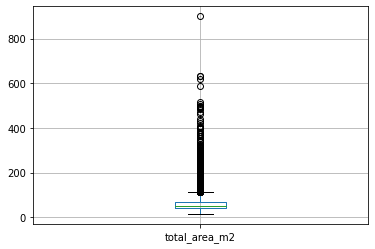

In [35]:
data.boxplot(column=['total_area_m2'])
data['total_area_m2'].describe()

Text(0.5, 0, 'total_area_m2')

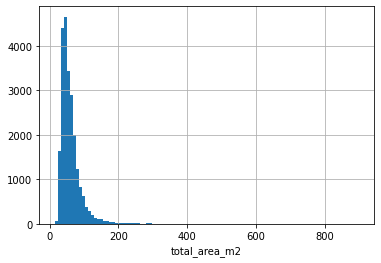

In [36]:
data['total_area_m2'].hist(bins=100).set_xlabel('total_area_m2')

Гистограмма похожа на график нормального распределения, но содержит хвост в правую сторону. В объявлениях средняя площадь квартир равна 60 кв.метрам, минимальная площадь 14 кв метров, медиана площади квартиры равна 52 квадратным метрам. Стоит отметить, что средняя площадь выше медианной из-за квартир с площадью от 200 кв.метров, это наглядно представлено на диаграмме размаха

**2. Изучим столбец `living_area_m2` с жилой площадью квартиры. Выгрузим данные методом describe(), построим диаграмму размаха и гистограмму**

count    23458.000000
mean        34.658638
std         22.333908
min         10.080000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area_m2, dtype: float64

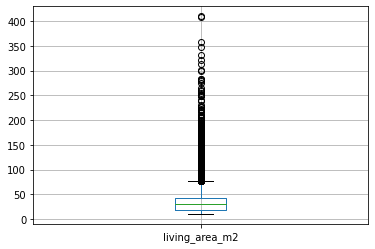

In [37]:
data.boxplot(column=['living_area_m2'])
data['living_area_m2'].describe()

Text(0.5, 0, 'living_area_m2')

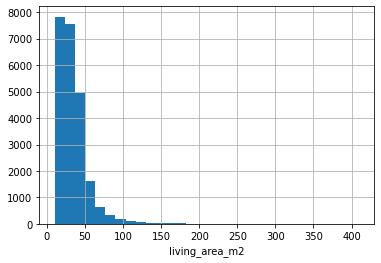

In [38]:
data['living_area_m2'].hist(bins=30).set_xlabel('living_area_m2')

На гистограмме сразу выделяется пик близкий к 20 кв.метрам, что не является Пуассоновским распределением, также наблюдается хвост значений в большую сторону. В среднем в объявлениях указаны квартиры с жилой площадью равной 34 кв.м, медиана близка к среднему и составляет 30 кв.м. Объявение с минимальная жилой площадью - 10 кв.метров, максимальной - 409 кв.метров.

3. **Изучим столбец `kitchen_area_m2` площадью кухни. Выгрузим данные методом describe(), построим диаграмму размаха и гистограмму**

count    23458.000000
mean        10.458586
std          5.976448
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area_m2, dtype: float64

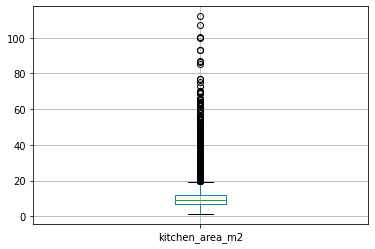

In [39]:
data.boxplot(column=['kitchen_area_m2'])
data['kitchen_area_m2'].describe()

Text(0.5, 0, 'kitchen_area_m2')

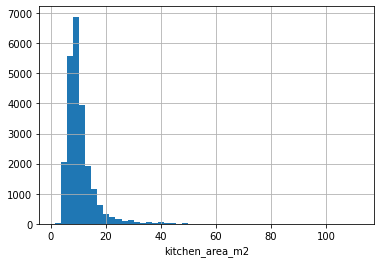

In [40]:
data['kitchen_area_m2'].hist(bins=50).set_xlabel('kitchen_area_m2')

Площадь кухни в отличии от жилой площади стремится к распределению Пуассона. В объявлениях: средняя площадь кухни равна 10 кв.м, минимальная 1.3 кв.м (что нормально, учитывая квартиры с открытой планировкой и студии, где кухня и жилая площадь - это практически единое пространнство), медиана равна 10 кв.м, а максимальная площадь 112 кв.м

**4. Изучим столбец `last_price_rub` с ценой объекта. Выгрузим данные методом describe(), построим диаграмму размаха и гистограмму.** Для более удобного восприятия информации, создадим столбец, в котором цена будет указана в млн.руб

<AxesSubplot:>

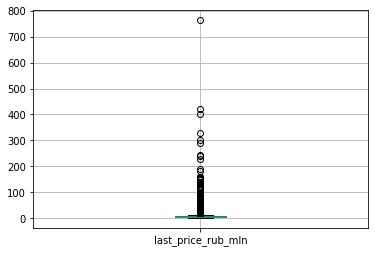

In [41]:
data['last_price_rub_mln'] = data['last_price_rub']/1000000
data.boxplot(column=['last_price_rub_mln'])

count    23458.000000
mean         6.518754
std         10.875999
min          0.430000
25%          3.405250
50%          4.642000
75%          6.760000
max        763.000000
Name: last_price_rub_mln, dtype: float64

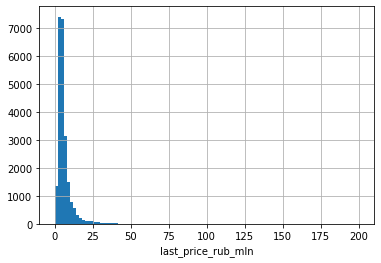

In [42]:
data['last_price_rub_mln'].hist(bins=100, range=(0,200)).set_xlabel('last_price_rub_mln')
data['last_price_rub_mln'].describe()

Из данных следует, что объявление с самой низкой ценой - 0.43 млн.руб., в среднем цена на квартиру составляет 6.5 млн.руб. Из-за квартир с очень высокой стоимостью, медиана сильно ниже среднего и составляет 4.6 млн.руб, что более корректно для оценки средней цены. Максимальная стоимость квартиры 763 млн.руб.

**5. Изучим столбец `rooms` с информацией о количестве комнат. Выгрузим данные методом describe() и построим диаграмму размаха и гистограмму**

count    23458.000000
mean         2.072257
std          1.077081
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

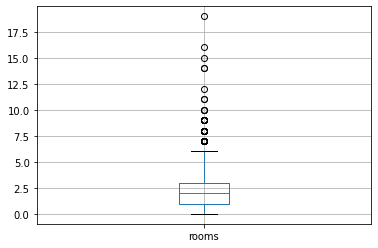

In [43]:
data.boxplot(column=['rooms'])
data['rooms'].describe()

Text(0.5, 0, 'rooms')

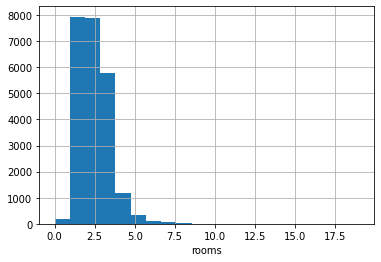

In [44]:
data['rooms'].hist(bins=20).set_xlabel('rooms')

Гистограмма распределения Пуассона. В среднем данные содержат объявления о продаже квартир с 2 комнатами, минимальное количество комнат - 0 (сюда входят студии, открытые планировки), медиана тоже равна 2 комнатам, межквартильное распределение выглядит логичным, есть выбросы начиная от 6 комнат. Максимально количество комнат 19.

**6. Изучим столбец `ceiling_height_m` с информацией о высоте потолка. Выгрузим данные методом describe() и построим гистограмму**

count    23458.000000
mean         2.698197
std          0.242316
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.300000
Name: ceiling_height_m, dtype: float64

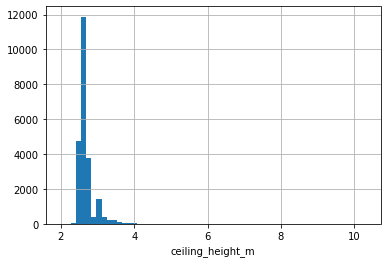

In [45]:
data['ceiling_height_m'].hist(bins=60).set_xlabel('ceiling_height_m')
data['ceiling_height_m'].describe()

Из данных следует, что в среднем высота потолка в квартире 2.7 метров, что практически равно медианному значению (2.65), максимальная высота потолков 10.3 метра. Стандартное распределение нормальное и составляет 24 см

**7. Изучим столбец `floor` с информацией об этаже квартиры. Выгрузим данные методом describe(), построим диаграмму размаха и гистограмму**

count    23458.000000
mean         5.875224
std          4.865413
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

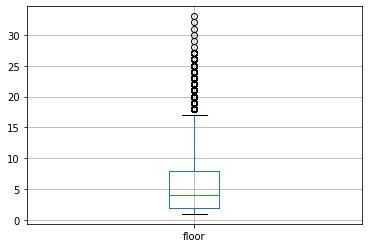

In [46]:
data.boxplot(column=['floor'])
data['floor'].describe()

Text(0.5, 0, 'floor')

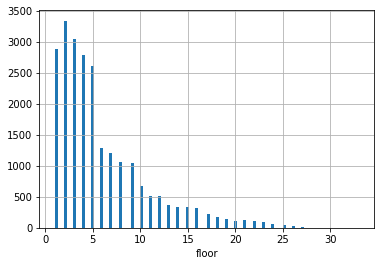

In [47]:
data['floor'].hist(bins=100).set_xlabel('floor')

Гистограмма стремится к Пуассоновскому распределению, но большой хвост в большую сторону. В объявлениях в среднем содержатся объявления о продаже квартир на 6 этаже, при этом медианное значение принадлежит 4 этажу. Минимальный этаж в объявлениях - 1, максимальный - 33, эти данные логичны.

**8. Изучим столбец `floor_type` с информацией о типах этажей квартир. Посмотрим соотношение групп с помощью метода value_counts() и построим круговую диаграмму**

In [48]:
data['floor_type'].value_counts()/data['floor_type'].count()*100

другой       73.608151
последний    14.097536
первый       12.294313
Name: floor_type, dtype: float64

<AxesSubplot:ylabel='floor_type'>

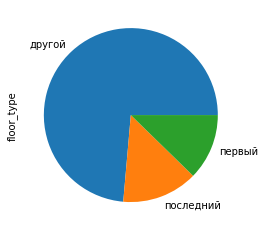

In [49]:
data['floor_type'].value_counts().plot(kind='pie')

Диаграмма наглядно показывает практически одинаковые доли групп объявлений о продаже квартир на первом и последнем этажах (12% и 14%) и многочисленную группу других этажей (74%). Из данных следует вывод, что меньше всего объявлений о продаже квартир на первом этаже.

**9. Изучим столбец `floors_total` с информацией об общем количестве этажей в доме. Выгрузим данные методом describe(), построим диаграмму размаха и гистограмму**

count    23458.000000
mean        10.673203
std          6.591979
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

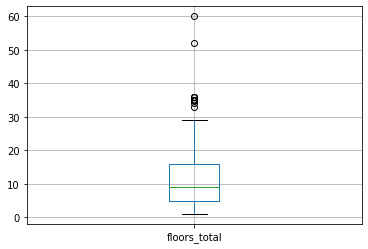

In [50]:
data.boxplot(column=['floors_total'])
data['floors_total'].describe()

Text(0.5, 0, 'floors_total')

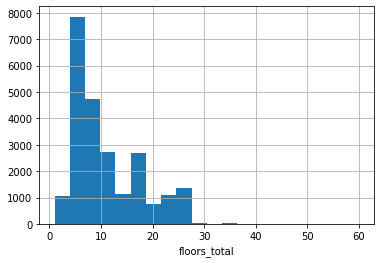

In [51]:
data['floors_total'].hist(bins=20).set_xlabel('floors_total')

Гистограмма нормального распределения. Из данных следует вывод о том, что в среднем дома в объявлениях 11-этажные, однако медианное значение указывает на 9-этажные дома. Минимальная этажность дома 1 этаж, максимальная 60 этажей.

**10. Изучим столбец `city_centers_nearest_m` с информацией о расстоянии от центра города в метрах. Выгрузим данные методом describe(), построим диаграмму размаха и гистограмму**

count    23458.000000
mean     10872.135775
std       9637.583532
min          0.000000
25%       2152.000000
50%      11246.000000
75%      15233.000000
max      65968.000000
Name: city_centers_nearest_m, dtype: float64

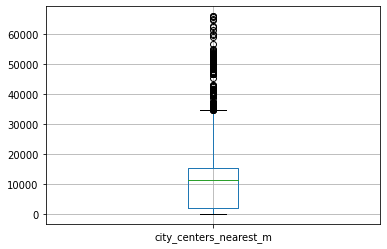

In [52]:
data.boxplot(column=['city_centers_nearest_m'])
data['city_centers_nearest_m'].describe()

Text(0.5, 0, 'city_centers_nearest_m')

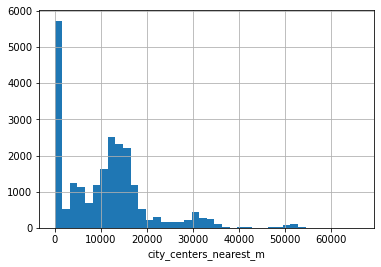

In [53]:
data['city_centers_nearest_m'].hist(bins=40).set_xlabel('city_centers_nearest_m')

Из данных следует вывод, что в среднем квартиры расположены в 10.9 км от центра, это практически совпадает с медианным значением равным 11.2 км. Максимально удаленная от центра квартира находится в 66 километрах, а ближайшая в 0 (нулевых значений много, но стоит отметить, что нулем также обозначались пропущенные значения, поэтому это необязательно значит, что квартира находится в непосредственном центре города)

**11. Изучим столбец `airports_nearest_m` с информацией о расстоянии от центра города в метрах. Выгрузим данные методом describe(), построим диаграмму размаха и гистограмму**

count    23458.000000
mean     22016.910350
std      16458.682669
min          0.000000
25%      10140.500000
50%      21807.000000
75%      34279.000000
max      84869.000000
Name: airports_nearest_m, dtype: float64

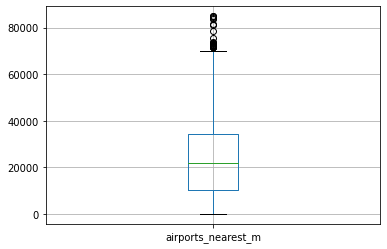

In [54]:
data.boxplot(column=['airports_nearest_m'])
data['airports_nearest_m'].describe()

Text(0.5, 0, 'airports_nearest_m')

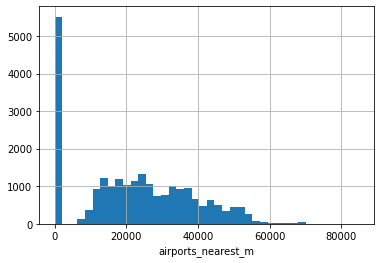

In [55]:
data['airports_nearest_m'].hist(bins=40).set_xlabel('airports_nearest_m')

Из данных следует вывод о том, что в среднем квартиры расположены в 22 км от аэропорта, это практически совпадает с медианным значением равным 21.8 км. Максимально удаленная от аэропорта квартира находится в 85 километрах, а ближайшая в 0 (нулевых значений много, но стоит отметить, что нулем также обозначались пропущенные значения, поэтому это необязательно значит, что квартира находится в непосредственной близости к аэропорту)

**12. Изучим столбец `parks_nearest_m` с информацией о расстоянии до ближайшего парка. Выгрузим данные методом describe(), построим диаграмму размаха и гистограмму**

count    23458.000000
mean       166.667278
std        305.176817
min          0.000000
25%          0.000000
50%          0.000000
75%        301.000000
max       3190.000000
Name: parks_nearest_m, dtype: float64

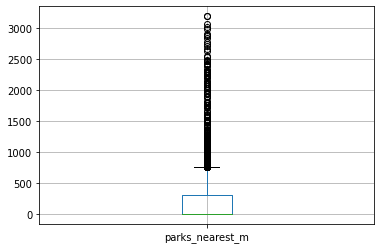

In [56]:
data.boxplot(column=['parks_nearest_m'])
data['parks_nearest_m'].describe()

Text(0.5, 0, 'parks_nearest_m')

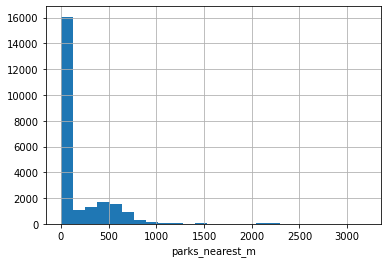

In [57]:
data['parks_nearest_m'].hist(bins=25).set_xlabel('parks_nearest_m')

Из данных следует вывод о том, что 50% объявлений с квартирами, скорее всего, без парка поблизости (пропущенные значения обозначались нулем). Квартиры, рядом с которыми есть парки, в среднем удалены от них на 166 метров, максимальная удаленность парка равна 3.2 км.

**13. Изучим столбцы `exposition_weekday` и `exposition_month` с информацией о дне и месяце публикации объявления. Посмотрим соотношение групп с помощью метода value_counts() и построим круговую диаграмму по каждому столбцу**

Данные по `exposition_weekday`:

In [58]:
data['exposition_weekday'].value_counts()/data['exposition_weekday'].count()*100

Thursday     18.130275
Tuesday      17.648563
Friday       16.915338
Wednesday    16.761872
Monday       15.231478
Saturday      8.159263
Sunday        7.153210
Name: exposition_weekday, dtype: float64

<AxesSubplot:ylabel='exposition_weekday'>

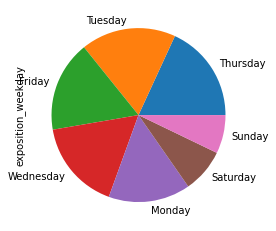

In [59]:
data['exposition_weekday'].value_counts().plot(kind='pie')

Из данных по дням недели следует вывод о том, что количество публикаций объявлений,примерно одинаково: в четверг, вторник, пятницу и среду (доли по дням 18.1%, 17.6%, 16.9%, 16.8% соответственно), при этом в понедельник публикации происходили немного реже (в 15%.2% случаев) и существенно ниже по выходным (8% в субботу и 7% в воскресенье). Данные выглядят логично, так как по выходным люди предпочитают отдыхать и не заниматься делами

Данные по `exposition_month`:

In [60]:
data['exposition_month'].value_counts()/data['exposition_month'].count()*100

February     11.156109
March        10.942962
April        10.017904
November     10.017904
October       8.892489
September     8.359621
June          7.426038
August        7.374883
July          7.157473
December      6.948589
January       6.338989
May           5.367039
Name: exposition_month, dtype: float64

<AxesSubplot:ylabel='exposition_month'>

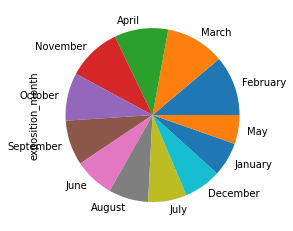

In [61]:
data['exposition_month'].value_counts().plot(kind='pie')

Из данных следует вывод о том, что количество объявлений, которые публиковались в феврале, марте, апреле и ноябре (11.2%, 10.9%, 10% и 10% соответственно) примерно одинаковое, в сентябре и октябре происходит небольшой спад (8.3%, 8.9% соответственно). Доля объявлений опубликованных в летние месяцы практически одинакова и равна (7.4%, 7.1%, 7.4% соответственно). Наименьшее количество объявлений опубликованы в мае (5.3%), также низкая доля у объявлений опубликованных в декабре и январе (6.9%, 6.3%). Это может быть связано с длинными каникулами и праздниками в эти месяцы, когда люди предпочитают не заниматься делами, а также уезжать в отпуск

Сгруппируем данные, чтобы посмотреть в какой день недели и какого месяца сделано наименьшее и наибольшее количество объявлений:

In [62]:
data.groupby('exposition_month')['exposition_weekday'].value_counts().sort_values()

exposition_month  exposition_weekday
May               Sunday                 67
                  Saturday               73
August            Sunday                103
June              Sunday                117
January           Sunday                118
                                       ... 
April             Monday                448
February          Tuesday               453
March             Tuesday               486
November          Friday                517
February          Thursday              760
Name: exposition_weekday, Length: 84, dtype: int64

Полученные данные логичны: наименьшее количество объявлений сделано в выходные мая (67 в воскресенье и 73 в субботу), а наибольшее по четвергам февраля (760 шт). Это подтверждает выводы сделанные ранее.

Вывод: изучили такие параметры как общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления. По каждому из этих параметров построили гистограммы и зафиксировали наблюдения, описав их под каждой гистограммой, например вывод о том, что наименьшее количество объявлений опубликовано в мае (5.3%), также низкая доля у объявлений опубликованных в декабре и январе (6.9%, 6.3%), это может быть связано с длинными каникулами и праздниками в эти месяцы, когда люди предпочитают не заниматься делами, а также уезжать в отпуск.

**II. Изучим как быстро продавались квартиры. Для этого построим гистограмму по столбцу `days_exposition`, посчитаем среднее и медиану методом describe()**

In [63]:
data['days_exposition'].describe()

count    20309.000000
mean       180.872470
std        219.804252
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0.5, 0, 'days_exposition')

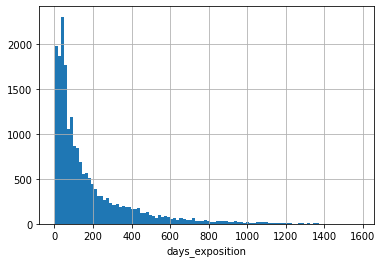

In [64]:
data['days_exposition'].hist(bins=100).set_xlabel('days_exposition')

Вывод: в среднем на продажу квартиры уходит примерно 169 дней, но медианное значение указывает на 95 дней, что почти вдвое меньше среднего. Судя по графику это могло произойти из-за ассиметричности в большую сторону и повлияло на среднее. Правильнее использовать медианное значение, таким образом, обычно на продажу квартиры уходит 95 дней. Самая быстрая продажа квартиры произошла за 1 день, а самая продолжительная продажа длилась 1580 дней (примерно 4 года). В среднем быстрыми можно считать продажи до 45 дней, а долгие более 199 дней (исходя из данных первого и третьего квартиля)

**III. Изучим зависимость цены от общей площади, жилой площади, площади кухни, количества комнат, типа этажа на котором находится квартира, даты размещения объявления (день недели, месяц, год)****

Построим корреляционную матрицу, чтобы проследить зависимость цены от каждого фактора, перед этим заменив категориальные значения в столбцах даты и типа этажа на количественные:

In [65]:
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year
data['floor_type'] = data['floor_type'].str.replace('первый', '0')
data['floor_type'] = data['floor_type'].str.replace('другой', '1')
data['floor_type'] = data['floor_type'].str.replace('последний', '2')
data['floor_type'] = data['floor_type'].astype('int')
factors = data[['last_price_rub', 'total_area_m2', 'living_area_m2', 'kitchen_area_m2','rooms',\
               'floor_type','exposition_weekday', 'exposition_month','exposition_year']]
factors.corr()

,last_price_rub,total_area_m2,living_area_m2,kitchen_area_m2,rooms,floor_type,exposition_weekday,exposition_month,exposition_year
last_price_rub,1.000000,0.655327,0.588088,0.513218,0.362294,0.057832,0.001829,0.002416,-0.041707
total_area_m2,0.655327,1.000000,0.953299,0.666324,0.760729,0.062031,-0.005298,0.003501,-0.077612
living_area_m2,0.588088,0.953299,1.000000,0.509461,0.828055,0.057508,-0.005411,-0.000455,-0.071709
kitchen_area_m2,0.513218,0.666324,0.509461,1.000000,0.328596,0.050821,-0.005403,0.003700,-0.058424
rooms,0.362294,0.760729,0.828055,0.328596,1.000000,0.024780,-0.005580,-0.004027,-0.055109
floor_type,0.057832,0.062031,0.057508,0.050821,0.024780,1.000000,0.006507,0.007886,0.004550
exposition_weekday,0.001829,-0.005298,-0.005411,-0.005403,-0.005580,0.006507,1.000000,0.012741,-0.003446
exposition_month,0.002416,0.003501,-0.000455,0.003700,-0.004027,0.007886,0.012741,1.000000,-0.269578
exposition_year,-0.041707,-0.077612,-0.071709,-0.058424,-0.055109,0.004550,-0.003446,-0.269578,1.000000


Из данных таблицы следует вывод о том, что тип этажа, день недели, месяц и год очень слабо коррелируют с ценой на квартиры(корреляция 0.057, 0.001, 0.002, -0.04). Количество комнат в квартире слабо взаимосвязано с ценой на квартиру (корреляция 0.36). Площадь кухни, жилая площадь и общая площадь в квартире имеют среднюю корреляцию к цене квартиры (0.51, 0.58 и 0.65). Соответственно наиболее влияющий на цену квартиры фактор - это общая площадь квартиры. 

Корреляция года к цене имеет отрицательное значение, что говорит об их обратной зависимости, и падением цен с каждым годом, проверим как менялась средняя цена с каждым годом: 

In [66]:
data.groupby('exposition_year')['last_price_rub_mln'].agg(['count', 'mean', 'median'])

,count,mean,median
exposition_year,,,
2014,136,12.121037,7.8685
2015,1169,8.477812,5.3000
2016,2748,6.820839,4.5150
2017,8111,6.545553,4.5000
2018,8439,5.944984,4.5750
2019,2855,6.778825,5.0500


Цены на квартиры действительно падали с 2014 до 2017 года, но с 2018 по 2019 начали расти. Это объясняет отрицательную корреляцию стремящуюся к нулю.

Так как больше всего на цену влияет общая площадь квартиры, рассмотрим их более детально, для начала разделим цены квартир на группы (E - очень низкая цена, D - низкая цена, C - средняя цена, B - высокая цена, A - очень высокая цена) и отобразим количество объявлений, среднюю площадь квартиры и медиану площади квартиры в рамках категорий цен:

In [67]:
def price_category(row):
    try:
        if 0 <= row <= 2000000:
            return 'E очень низкая цена'
        elif 2000001 <= row <= 3500000:
            return 'D низкая цена'
        elif 3500001 <= row <= 6000000:
            return 'C средняя цена'
        elif 6000001 <= row <= 12000000:
            return 'B высокая цена'
        elif row >= 12000001:
            return 'A очень высокая цена'
    except:
        return 'no'
data['last_price_rub_category'] = data['last_price_rub'].apply(price_category)

In [68]:
price_area_stat = data.pivot_table(index='last_price_rub_category', values='total_area_m2')
data.groupby('last_price_rub_category')['total_area_m2'].agg(['count', 'mean', 'median'])

,count,mean,median
last_price_rub_category,,,
A очень высокая цена,1896,136.188914,118.0
B высокая цена,5338,74.155247,71.9
C средняя цена,9820,50.614478,48.0
D низкая цена,4970,40.468231,37.0
E очень низкая цена,1434,41.858068,41.0


Из таблицы следует вывод: с увеличением площади квартиры, цена на нее действительно растет, но стоит отметить, что в категориях до 6 млн.руб средняя площадь квартир практически одинакова.

Построим матрицу рассеяния для наиболее взаимосвязанных с ценой факторов (общая площадь, жилая площадь, площадь кухни)

array([[<AxesSubplot:xlabel='last_price_rub_mln', ylabel='last_price_rub_mln'>,
        <AxesSubplot:xlabel='total_area_m2', ylabel='last_price_rub_mln'>,
        <AxesSubplot:xlabel='living_area_m2', ylabel='last_price_rub_mln'>,
        <AxesSubplot:xlabel='kitchen_area_m2', ylabel='last_price_rub_mln'>],
       [<AxesSubplot:xlabel='last_price_rub_mln', ylabel='total_area_m2'>,
        <AxesSubplot:xlabel='total_area_m2', ylabel='total_area_m2'>,
        <AxesSubplot:xlabel='living_area_m2', ylabel='total_area_m2'>,
        <AxesSubplot:xlabel='kitchen_area_m2', ylabel='total_area_m2'>],
       [<AxesSubplot:xlabel='last_price_rub_mln', ylabel='living_area_m2'>,
        <AxesSubplot:xlabel='total_area_m2', ylabel='living_area_m2'>,
        <AxesSubplot:xlabel='living_area_m2', ylabel='living_area_m2'>,
        <AxesSubplot:xlabel='kitchen_area_m2', ylabel='living_area_m2'>],
       [<AxesSubplot:xlabel='last_price_rub_mln', ylabel='kitchen_area_m2'>,
        <AxesSubplot:xlabel='tot

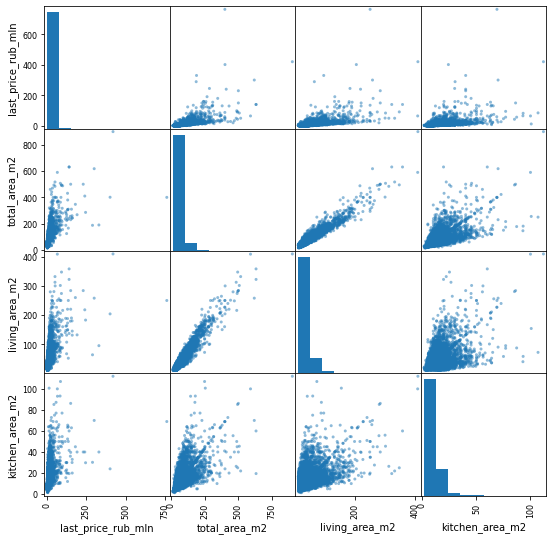

In [69]:
good_factors = data[['last_price_rub_mln', 'total_area_m2', 'living_area_m2', 'kitchen_area_m2']]
pd.plotting.scatter_matrix(good_factors, figsize=(9, 9))

Графики наглядно показывают сделанные ранее выводы, а также стоит отметить график корреляции общей площади квартиры и жилой площади. Их взаимосвязь очень высокая и стремится к 1.

Вывод: Наиболее влияющий на цену квартиры фактор - это общая площадь квартиры. Факторы наиболее коррелирующие между собой - это общая площадь квартиры и жилая площадь (корреляция 0.95), а также количество комнат и жилая площадь (корреляция 0.83)

**IV. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

In [70]:
top_ten_locality = data.pivot_table(index='locality_name', values='price_one_m2', aggfunc=['count', 'median', 'mean','min','max'])
top_ten_locality.columns = ('count','median','mean','min','max')
top_ten_locality.sort_values('count', ascending=False).head(10)

,count,median,mean,min,max
locality_name,,,,,
Санкт-Петербург,15535,104687.500,114730.227967,15861.57,1907500.00
Мурино,581,86119.400,85895.653305,50000.00,130000.00
Кудрово,469,95588.240,95260.658507,54160.35,160401.00
Шушары,437,76829.270,78563.355606,47700.42,147826.09
Всеволожск,398,65789.470,68654.473970,31400.00,640422.35
Пушкин,366,100000.000,103210.993169,59836.07,256521.74
Колпино,336,74729.185,75526.880506,50819.67,125000.00
Парголово,326,91780.225,90193.677883,39205.96,138522.43
Гатчина,306,67860.570,68935.194575,10507.25,146315.79


Вывод: мы рассмотрели 10 наиболее встречаемых населенных пунктов в объявлениях. В среднем самый дорогой квадратный метр в квартирах Санкт-Петербурга (114.7 тыс.руб), при этом медианное значение ниже из-за очень дорогих квартир завышающих среднее. Правильнее ориентироваться на медиану, которая равна 104 тыс.м и близка к стоимости одного квадратного метра в городе Пушкин (100 тыс.руб). Самая дешевый квадратный метр в среднем в объявлениях о продаже квартир в городе Выборг. Максимальная цена за квадратный метр составляет 1.9 млн.руб в объявлении о продаже квартиры в городе Санкт-Петербург. Минимальная цена за квадратный метр составляет 10 тыс.руб в объявлении о продаже квартиры в Гатчине.
Также стоит отметить, что наибольшее количество объявлений о продаже квартир в Санкт-Петербурге, а наименьшее в Выборге.

**V. Посчитаем среднюю цену каждого километра по квартирам Санкт-Петербурга и опишем как стоимость объектов зависит от расстояния до центра города**

In [71]:
data['one_km_price'] = data['last_price_rub_mln'] / data['city_centers_nearest_km']
spb_data = data.query('locality_name == "Санкт-Петербург" and city_centers_nearest_km!=0')
spb_data
print('Средняя цена одного километра:', spb_data['one_km_price'].median())

Средняя цена одного километра: 0.446875


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price_rub'}>,
        <AxesSubplot:title={'center':'total_area_m2'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height_m'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area_m2'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area_m2'}>],
       [<AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest_m'}>,
        <AxesSubplot:title={'center':'city_centers_nearest_m'}>,
        <AxesSubplot:title={'center':'parks_amount_around_3000_m'}>,
        <AxesSubplot:title={'center':'parks_nearest_m'}>],
       [<AxesSubplot:title={'center':'ponds_amount_around_3000_m'}>,
        <AxesSubplot:title={'center':'ponds_nearest_m'}>,
        <Ax

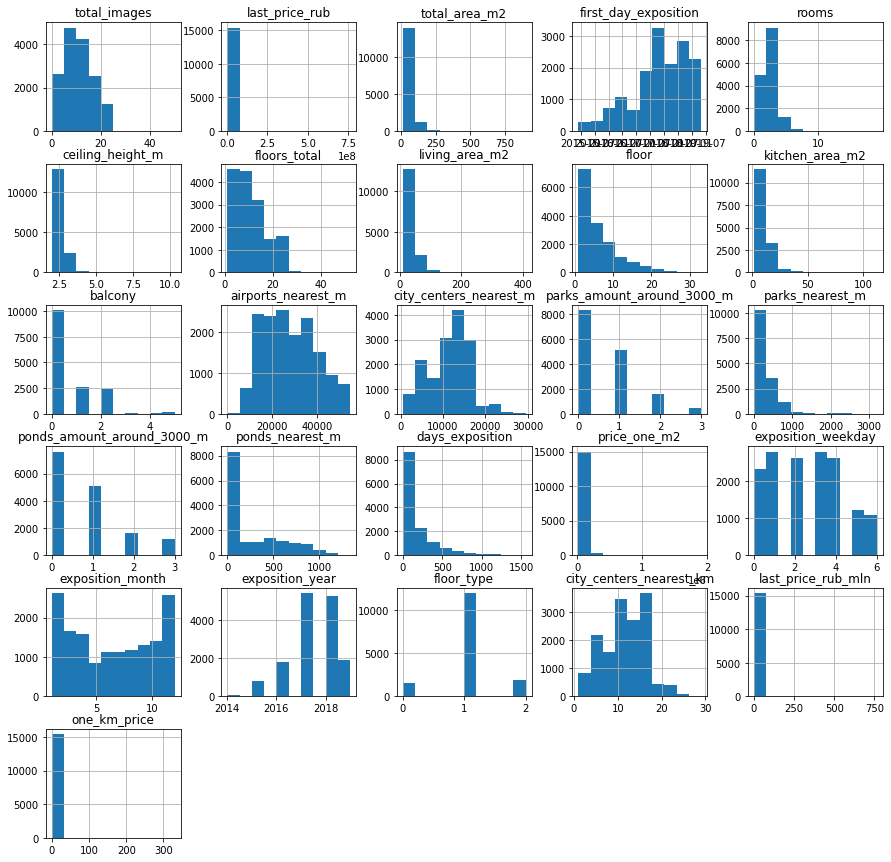

In [72]:
spb_data.hist(figsize=(15,15))


Мы вяснили, что средняя цена одного километра 446 тыс.руб. Ранее мы группировали цены на квартиры по категориям. Посмотрим среднее, максимальное и минимальное значение в рамках каждой группы, а также количество объявлений в Санкт-Петербурге по данным группам:

In [73]:
spb_km_price = spb_data.pivot_table(index='last_price_rub_category', \
                                    values='one_km_price', \
                                    aggfunc=['count', 'median', 'mean','min','max'])
spb_km_price.columns = ('count','median','mean','min','max')
spb_km_price

,count,median,mean,min,max
last_price_rub_category,,,,,
A очень высокая цена,1791,3.158333,6.438779,0.531481,330.000000
B высокая цена,4798,0.768077,1.284270,0.225000,12.000000
C средняя цена,7238,0.349167,0.424045,0.130929,5.980000
D низкая цена,1612,0.225000,0.249749,0.083333,3.500000
E очень низкая цена,11,0.108626,0.130931,0.094670,0.316667


Из таблицы следует вывод: что вместе со средней ценой за 1 км увеличивается и цена на квартиру. Самая высокая средняя цена на 1 км принадлежит объявлениям с категорией А (более 12 млн.руб за квартиру) и далее цены за 1 км уменьшаются с ценами на жилье. Стоит отметить, что в Санкт-Петербурге практически отсутствуют объявления с очень низкой ценой (категория E, цены до 2 млн.руб), таких объявлений всего 11 шт.

Теперь посмотрим удаленность от центра в километрах по данным ценовым группам: 

In [74]:
spb_km_price = spb_data.pivot_table(index='last_price_rub_category', values='city_centers_nearest_km', aggfunc=['count', 'median', 'mean','min','max'])
spb_km_price.columns = ('count','median','mean','min','max')
spb_km_price

,count,median,mean,min,max
last_price_rub_category,,,,,
A очень высокая цена,1791,6.0,7.177554,1.0,27.0
B высокая цена,4798,11.0,10.146311,1.0,28.0
C средняя цена,7238,13.0,13.097955,1.0,29.0
D низкая цена,1612,14.0,14.178040,1.0,29.0
E очень низкая цена,11,15.0,14.000000,6.0,18.0


In [75]:
spb_km_price = spb_data.pivot_table(index='city_centers_nearest_km', values='last_price_rub_mln', aggfunc=['count', 'median', 'mean','min','max'])
spb_km_price.columns = ('count','median','mean','min','max')
spb_km_price

,count,median,mean,min,max
city_centers_nearest_km,,,,,
1.0,190,11.490000,21.397318,3.500000,330.000000
2.0,308,10.000000,17.818114,2.100000,401.300000
3.0,346,8.409000,11.144981,2.385000,88.000000
4.0,679,9.200000,13.323249,2.176000,763.000000
5.0,898,9.483000,14.476980,2.740000,300.000000
6.0,614,8.895000,15.181845,1.900000,245.000000
7.0,413,7.800000,14.539145,2.250000,135.000000
8.0,588,7.375000,9.878694,2.190000,420.000000
9.0,586,5.350500,6.977712,2.346000,39.900000


Из таблицы следует вывод о том, что чем дальше находится квартира, тем ниже ее стоимость, квартиры в средней удаленности на 6 км от центра имеют самые высокие цены, а самые низкие цены на квартиры в 15 км от центра. Стоит также отметить, что после 8 км цена резко падает. Посмотрим на корреляцию:

In [76]:
price_distance = spb_data[['last_price_rub', 'city_centers_nearest_km']]
price_distance.corr()

,last_price_rub,city_centers_nearest_km
last_price_rub,1.000000,-0.254878
city_centers_nearest_km,-0.254878,1.000000


Показатели цены за квартиру и удаленности квартиры от центра имеют корреляцию (-0.25), это значит, что зависимость слабая и обратная (с увеличением километров от центра - цена падает).

Вывод: в рамках города Санкт-Петербург, чем дальше находится квартира от центра, тем ниже ее стоимость, квартиры в средней удаленности на 6 км от центра имеют самые высокие цены, а самые низкие цены на квартиры в 15 км от центра. После 8 км цена резко падает, также выяснили, что показатели цены за квартиру и удаленности квартиры от центра имеют корреляцию (-0.25), это значит, что зависимость слабая и обратная (с увеличением километров от центра - цена падает).

### Общий вывод

В ходе исследования:
1. Изучили такие параметры как общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления. По каждому из этих параметров построили гистограммы и зафиксировали наблюдения, описав их под каждой гистограммой, например вывод о том, что наименьшее количество объявлений опубликовано в мае (5.3%), также низкая доля у объявлений опубликованных в декабре и январе (6.9%, 6.3%), это может быть связано с длинными каникулами и праздниками в эти месяцы, когда люди предпочитают не заниматься делами, а также уезжать в отпуск.
2. Изучили, как быстро продавались квартиры и выяснили, что в среднем на продажу квартиры уходит 95 дней. Самая быстрая продажа квартиры произошла за 1 день, а самая продолжительная продажа длилась 1580 дней (примерно 4 года). В среднем быстрыми можно считать продажи до 45 дней, а долгие более 199 дней.
3. Изучили факторы, которые больше всего влияют на общую (полную) стоимость объекта и выяснили, что наиболее влияющий на цену квартиры фактор - это общая площадь квартиры.
4. Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выяснили, что в среднем самый дорогой квадратный метр в квартирах Санкт-Петербурга (104 тыс.руб), а самый дешевый в Выборге. Максимальная цена за квадратный метр составляет 1.9 млн.руб в объявлении о продаже квартиры в городе Санкт-Петербург. Минимальная цена за квадратный метр составляет 10 тыс.руб в объявлении о продаже квартиры в Гатчине. Наибольшее количество объявлений о продаже квартир в Санкт-Петербурге, наименьшее в Выборге.
5. Посчитали среднюю цену каждого километра, выделив квартиры только в Санкт-Петербурге и выяснили, что чем дальше находится квартира, тем ниже ее стоимость, квартиры в средней удаленности на 6 км от центра имеют самые высокие цены, а самые низкие цены на квартиры в 15 км от центра. После 8 км цена резко падает, также выяснили, что показатели цены за квартиру и удаленности квартиры от центра имеют корреляцию (-0.25), это значит, что зависимость слабая и обратная (с увеличением километров от центра - цена падает).
Из всего этого следует, что разные параметры квартир могут быть взаимосвязаны между собой(например жилая площадь и общая площадь квартиры), а могут никак не зависеть друг от друга (день публикации объявления и цена квартиры), для этого используется корреляционный анализ, графики и объединение разных факторов в группы. 